In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [22]:
data = pd.read_csv('boston_house_prices_f - boston_house_prices.csv.csv')

In [23]:
X = data.drop('MEDV',axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [28]:
model = Sequential([Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)),
                    Dense(32, activation='relu'),
                    Dense(1)])

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
history = model.fit(X_train_sc, y_train, epochs=50, batch_size=32, validation_data=(X_test_sc, y_test))

Epoch 1/50
13/13 [==============================] - 2s 19ms/step - loss: 599.2923 - val_loss: 510.5084
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 564.1496 - val_loss: 478.3712
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 525.9401 - val_loss: 438.7719
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 474.5214 - val_loss: 384.9015
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 405.8765 - val_loss: 312.6241
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 320.6236 - val_loss: 231.1297
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 231.6104 - val_loss: 153.9392
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 150.6462 - val_loss: 97.7801
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 101.3201 - val_loss: 65.4015
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 71.5382 - 

In [31]:
y_pred = model.predict(X_test_sc)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

4/4 [==============================] - 0s 4ms/step
Mean Squared Error: 13.69


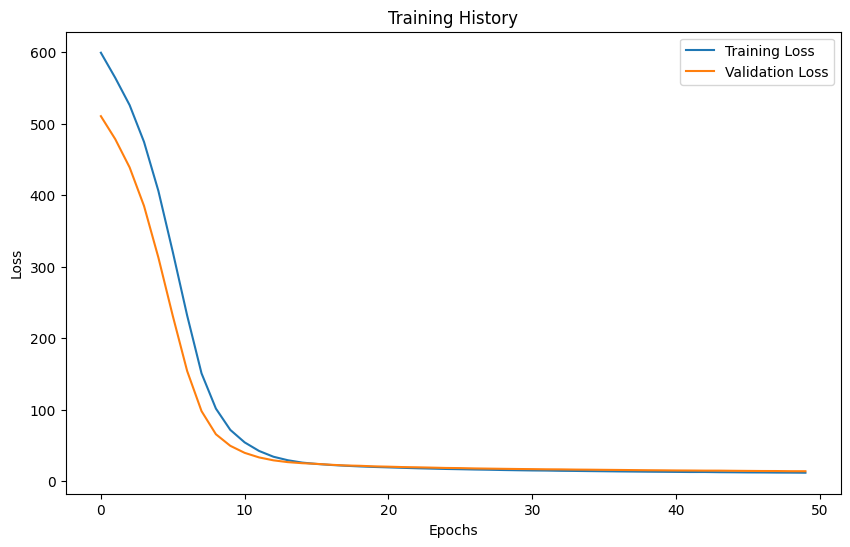

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training History')
plt.show()

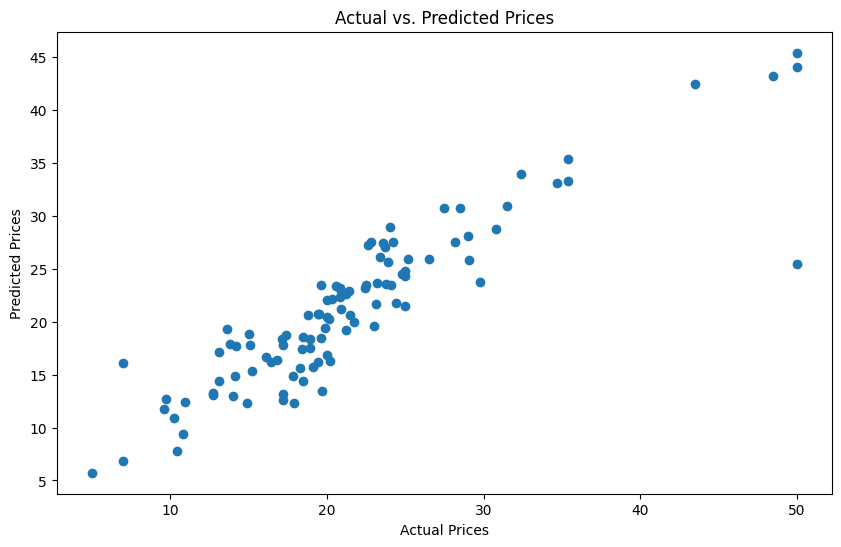

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()